<a href="https://colab.research.google.com/github/divyani95/Radiation_Analysis/blob/main/Hydran_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = '/content/Hydran.xlsx'
excel_data = pd.ExcelFile(file_path)

In [49]:
df = pd.read_excel(file_path, header=None)  # Load without assigning headers
print("Preview of Raw Data:")
print(df.head(10))

Preview of Raw Data:
                                                   0                 1  \
0  300 MW SOLAR PLANT,AVAADA SUNRISE ENERGY PVT L...               NaN   
1  Hydran Report  (4/24/2024 12:00:00 AM  To 4/25...               NaN   
2                                                NaN               NaN   
3                                         Time Stamp  SW1 HYDRAN LEVEL   
4                                                NaN             (PPM)   
5                                2024-04-24 00:00:01                80   
6                                2024-04-24 00:01:01                80   
7                                2024-04-24 00:02:01                80   
8                                2024-04-24 00:03:01                80   
9                                2024-04-24 00:04:01                80   

                         2             3                 4  \
0                      NaN           NaN               NaN   
1                      NaN           NaN

In [50]:
# Reload with appropriate header row (after identifying the correct row)
df = pd.read_excel(file_path, header=3)  # Adjust the header index as needed
print("Initial Shape of the Dataset:", df.shape)

Initial Shape of the Dataset: (1441, 10)


In [51]:
# Drop completely empty rows and columns
df = df.dropna(how='all')
df = df.dropna(axis=1, how='all')

In [52]:
# Handle rows/columns with significant missing values
df = df.dropna(thresh=int(0.5 * df.shape[1]), axis=0)  # Drop rows with >50% missing
df = df.dropna(thresh=int(0.5 * df.shape[0]), axis=1)  # Drop columns with >50% missing

In [53]:
# Convert all column names to strings
df.columns = df.columns.astype(str)

# Remove "Unnamed" columns if present
df = df.loc[:, ~df.columns.str.contains('Unnamed')]
print("Final Shape of the cleaned Dataset:", df.shape)

Final Shape of the cleaned Dataset: (1441, 10)


In [54]:
# Save the cleaned dataset
output_path = '/content/Hydran_Report.xlsx'
df.to_excel(output_path, index=False)
print(f"Cleaned dataset saved to: {output_path}")

Cleaned dataset saved to: /content/Hydran_Report.xlsx


In [55]:
# Step 2: Basic Data Exploration
# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for remaining missing values
print("\nMissing Values in Cleaned Dataset:")
print(df.isnull().sum())


Summary Statistics:
                          Time Stamp
count                           1440
mean   2024-04-24 11:59:31.049999872
min              2024-04-24 00:00:01
25%              2024-04-24 05:59:46
50%              2024-04-24 11:59:31
75%              2024-04-24 17:59:16
max              2024-04-24 23:59:01

Missing Values in Cleaned Dataset:
Time Stamp                 1
SW1 HYDRAN LEVEL           0
SW1 WATER \nCONTANT PPM    0
SW1 RH LEVEL               0
SW2 HYDRAN LEVEL           0
SW2 WATER \nCONTANT PPM    0
SW2 RH LEVEL               0
SW3 HYDRAN LEVEL           0
SW3 WATER CONTANT PPM      0
SW3 RH LEVEL               0
dtype: int64


In [56]:
# Step 3: Time Series Analysis (if time-based data exists)
if 'period_end' in df.columns:
    df['period_end'] = pd.to_datetime(df['period_end'])  # Convert to datetime
    plt.figure(figsize=(12, 6))
    plt.plot(df['period_end'], df.iloc[:, 1:].sum(axis=1))  # Sum values across columns
    plt.title("Overall Trends Over Time")
    plt.xlabel("Time")
    plt.ylabel("Sum of Values")
    plt.grid(True)
    plt.show()

Time Stamp                  int64
SW1 HYDRAN LEVEL           object
SW1 WATER \nCONTANT PPM    object
SW1 RH LEVEL               object
SW2 HYDRAN LEVEL           object
SW2 WATER \nCONTANT PPM    object
SW2 RH LEVEL               object
SW3 HYDRAN LEVEL           object
SW3 WATER CONTANT PPM      object
SW3 RH LEVEL               object
dtype: object
Time Stamp                   int64
SW1 HYDRAN LEVEL           float64
SW1 WATER \nCONTANT PPM     object
SW1 RH LEVEL                object
SW2 HYDRAN LEVEL            object
SW2 WATER \nCONTANT PPM     object
SW2 RH LEVEL                object
SW3 HYDRAN LEVEL            object
SW3 WATER CONTANT PPM       object
SW3 RH LEVEL                object
dtype: object
Time Stamp                   int64
SW1 HYDRAN LEVEL           float64
SW1 WATER \nCONTANT PPM    float64
SW1 RH LEVEL                object
SW2 HYDRAN LEVEL            object
SW2 WATER \nCONTANT PPM     object
SW2 RH LEVEL                object
SW3 HYDRAN LEVEL            object
SW

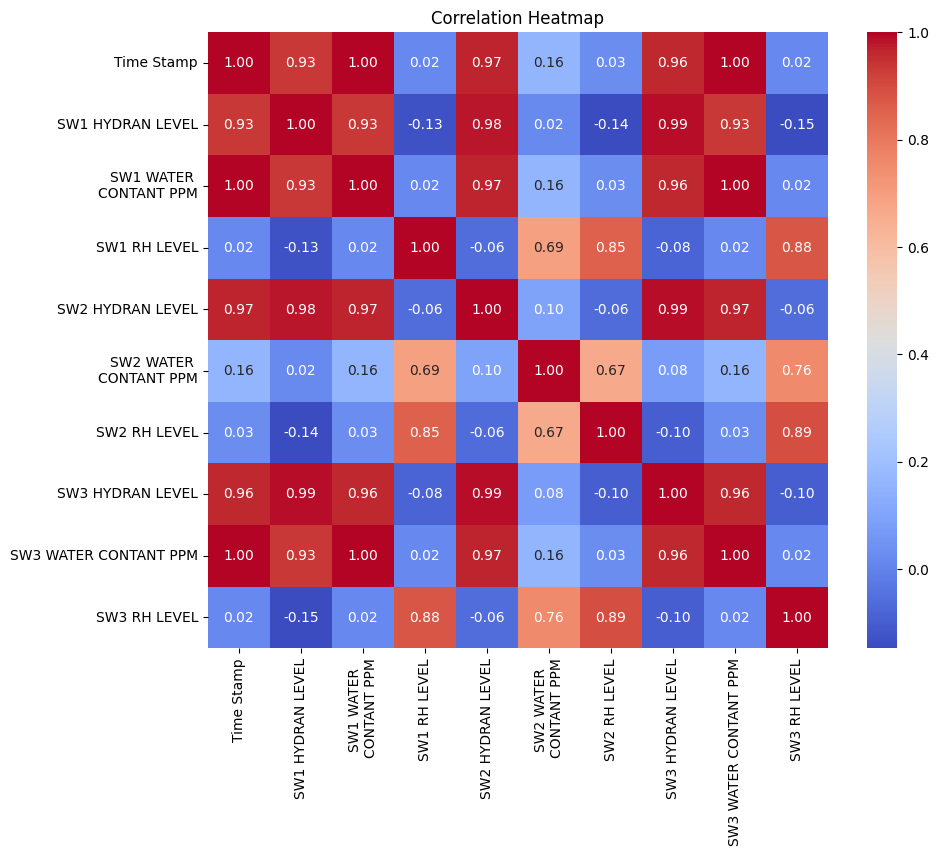

In [57]:
# print(df.dtypes)
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')
    df.fillna(0, inplace=True)  # Replace NaN with 0
    print(df.dtypes)
# Step 4: Correlation Analysis
# Calculate and display a heatmap of correlations
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
if not numeric_columns.empty:
    correlation_matrix = df[numeric_columns].corr()
    if not correlation_matrix.empty:
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
        plt.title("Correlation Heatmap")
        plt.show()
    else:
        print("\nNo correlations to display: Correlation matrix is empty.")
else:
    print("\nNo numeric columns available for correlation analysis.")

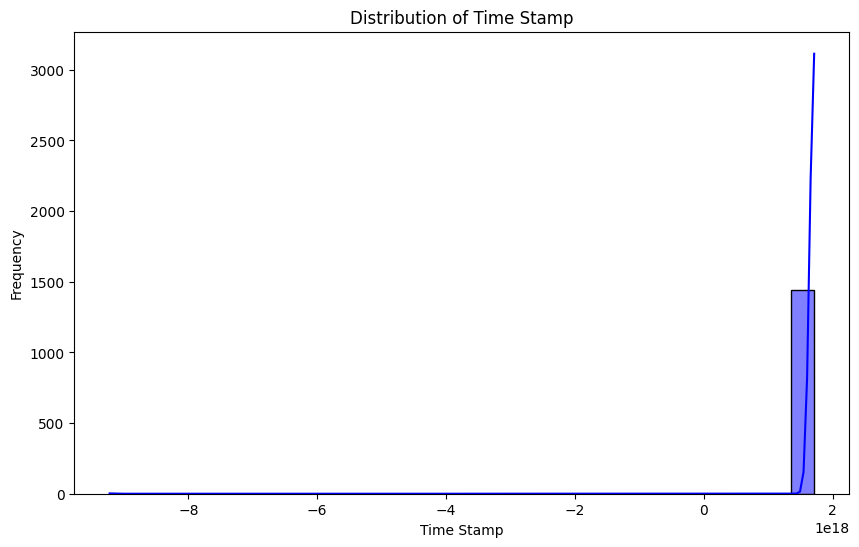

In [58]:
# Step 5: Distribution of Key Columns
# Visualize the distribution of the first numeric column (example)
if not numeric_columns.empty:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[numeric_columns[0]], kde=True, bins=30, color="blue")
    plt.title(f"Distribution of {numeric_columns[0]}")
    plt.xlabel(numeric_columns[0])
    plt.ylabel("Frequency")
    plt.show()

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

In [60]:

# Load the Excel file
file_path = "/content/Hydran_Report.xlsx"  # Change this to your file path
df = pd.read_excel(file_path)

In [61]:
print("Original Columns:", df.columns)
print("Number of Columns:", len(df.columns))

Original Columns: Index(['Time Stamp', 'SW1 HYDRAN LEVEL', 'SW1 WATER \nCONTANT PPM',
       'SW1 RH LEVEL', 'SW2 HYDRAN LEVEL', 'SW2 WATER \nCONTANT PPM',
       'SW2 RH LEVEL', 'SW3 HYDRAN LEVEL', 'SW3 WATER CONTANT PPM',
       'SW3 RH LEVEL'],
      dtype='object')
Number of Columns: 10


In [62]:
# Define the new column names
new_column_names = ["Time_Stamp", "Radiation_GHI", "Radiation_GII", "Radiation_GHI_Acc",
                    "Radiation_GII_Acc", "Wind_Speed", "Wind_Direction", "Humidity",
                    "Ambient_Temperature", "Module_Temperature", "Rain",
                    "Diffuse_Radiation", "Today_Rain"]

In [63]:

# Convert Time_Stamp to datetime
df["Time Stamp"] = pd.to_datetime(df["Time Stamp"], errors="coerce") # Access column using its actual name 'Time Stamp'

In [64]:
# Convert numeric columns
numeric_columns = df.columns[1:]  # Exclude Time_Stamp
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [67]:
# Drop missing values
df = df.dropna(subset=['Time Stamp'])  # Use the correct column name from the output

In [69]:
# Define the new column names
new_column_names = ["Time_Stamp", "Radiation_GHI", "Radiation_GII", "Radiation_GHI_Acc",
                    "Radiation_GII_Acc", "Wind_Speed", "Wind_Direction", "Humidity",
                    "Ambient_Temperature", "Module_Temperature", "Rain",
                    "Diffuse_Radiation", "Today_Rain"]


In [72]:
# Resample data to hourly intervals (mean values per hour)
df_resampled = df.set_index('Time Stamp').resample("H").mean() # Set 'Time_Stamp' as index

<ipython-input-72-67f4465363d2>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df.set_index('Time Stamp').resample("H").mean() # Set 'Time_Stamp' as index


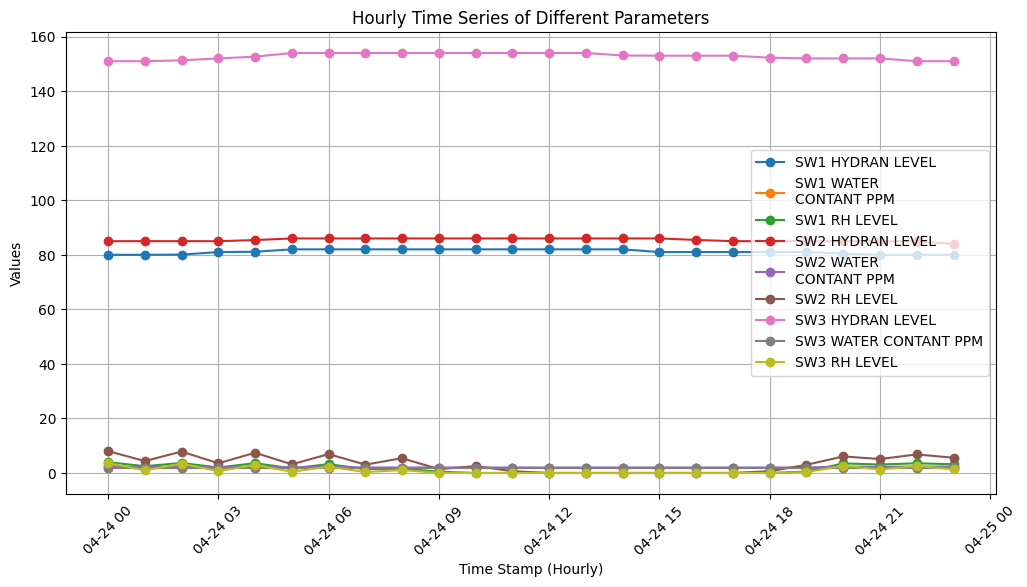

In [73]:
# Plot each resampled column against Time_Stamp
plt.figure(figsize=(12, 6))
for col in numeric_columns:
    plt.plot(df_resampled.index, df_resampled[col], label=col, marker='o', linestyle="-")

plt.xlabel("Time Stamp (Hourly)")
plt.ylabel("Values")
plt.title("Hourly Time Series of Different Parameters")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()